In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


C:\Users\Guille\AppData\Local\Temp\ipykernel_13268\3033444179.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\Guille\AppData\Local\Temp\ipykernel_13268\3033444179.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Accuracy: 0.7821229050279329

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179


Feature Importance:
    feature  importance
1       Sex    0.310280
5      Fare    0.242798
2       Age    0.217041
0    Pclass    0.111619
3     SibSp    0.056342
4     Parch    0.037738
6  Embarked    0.024181


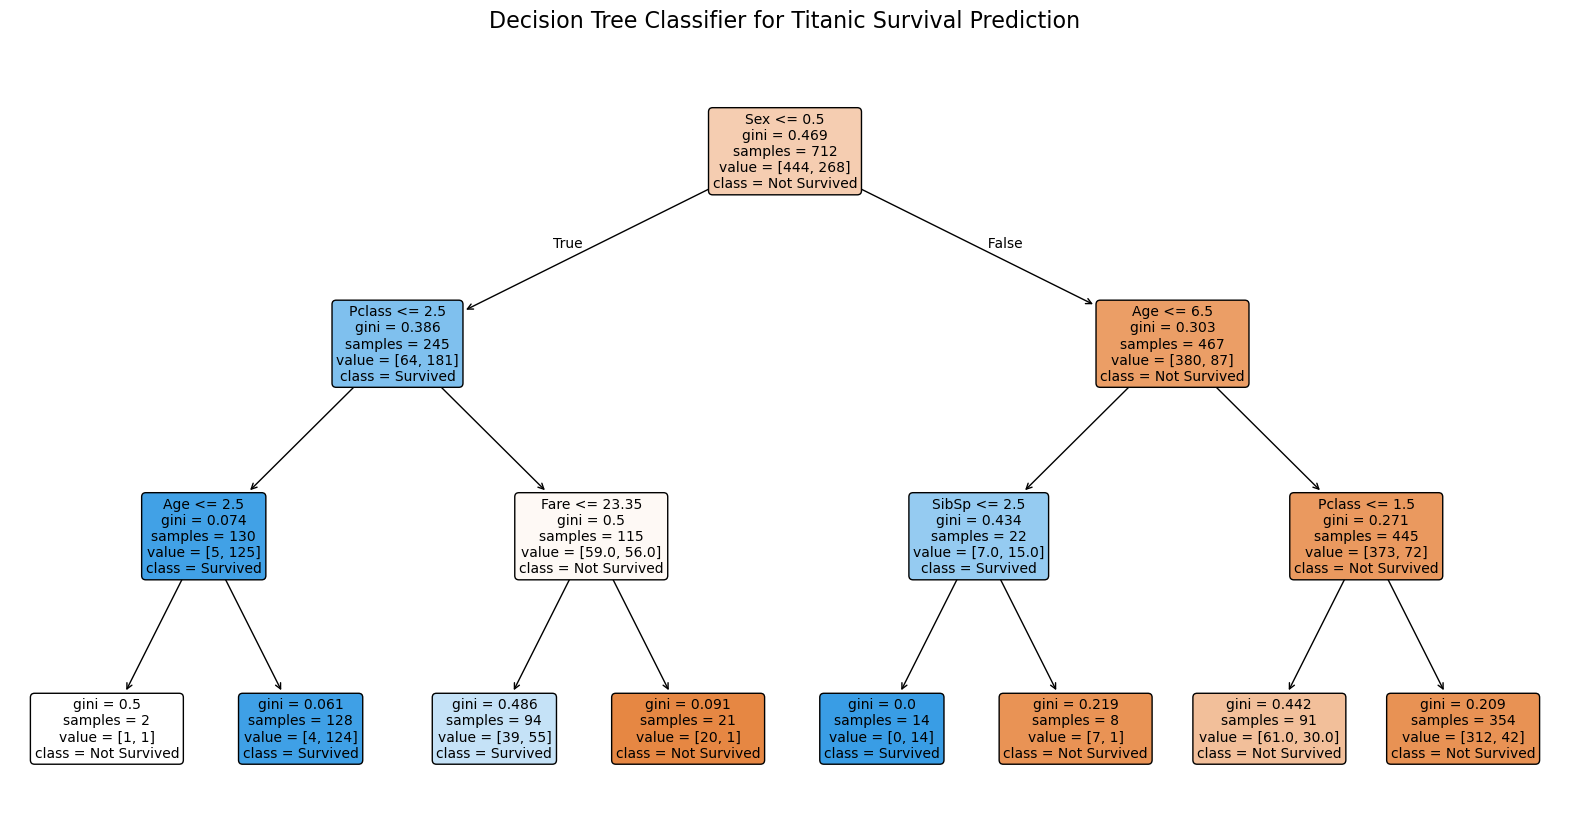


Feature encodings:
Sex: Female = 0 , Male = 0
Embarked: 
C (Cherbourg) = 0 
Q (Queenstown) = 0 
S (Southampton) = 0


In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Handle missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create X (features) and y (target)
X = titanic[features].copy()
y = titanic['Survived']

# Encode categorical variables
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': dt_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

# Create and train a smaller tree for better visualization
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Create figure for visualization
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt_classifier, 
          feature_names=features,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)

# Add title
plt.title('Decision Tree Classifier for Titanic Survival Prediction', pad=20, size=16)

# Show plot
plt.show()

# Print feature meanings for categorical variables
print("\nFeature encodings:")
print("Sex: Female =", le.fit_transform(['female'])[0], ", Male =", le.fit_transform(['male'])[0])
print("Embarked:", 
      "\nC (Cherbourg) =", le.fit_transform(['C'])[0],
      "\nQ (Queenstown) =", le.fit_transform(['Q'])[0],
      "\nS (Southampton) =", le.fit_transform(['S'])[0])